## 📦 Setup

In [3]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Config ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

TICKERS_TO_LOAD = ["AAPL", "GOOGL", "PEP"]  # 👈 update as needed
FEATURES_DIR = "features_data/tickers_history"

# --- Load only selected ticker files ---
dfs = []
for ticker in TICKERS_TO_LOAD:
    path = os.path.join(FEATURES_DIR, f"{ticker}.parquet")
    if not os.path.exists(path):
        print(f"⚠️ File not found for {ticker}: {path}")
        continue
    dfs.append(pl.read_parquet(path))

if not dfs:
    raise ValueError("❌ No valid ticker files loaded.")

df = pl.concat(dfs)
pdf = df.to_pandas()

# --- Preview ---
print("✅ Loaded tickers:", TICKERS_TO_LOAD)
print("📦 Data shape:", pdf.shape)
print("🧾 Columns:", pdf.columns.tolist())
print("🆔 Tickers present:", pdf['ticker'].unique())

# Optional preview
display(pdf.head())


✅ Loaded tickers: ['AAPL', 'GOOGL', 'PEP']
📦 Data shape: (6, 26)
🧾 Columns: ['ticker', 'as_of', '6m_return', '12m_return', 'volatility', 'max_drawdown_1y', 'sector_relative_6m', 'sma_50_200_delta', 'net_debt_to_ebitda', 'ebit_interest_cover', 'ebit_interest_cover_capped', 'eps_cagr_3y', 'fcf_cagr_3y', 'dividend_yield', 'dividend_cagr_3y', 'dividend_cagr_5y', 'yield_vs_5y_median', 'pe_ratio', 'pfcf_ratio', 'payout_ratio', 'has_eps_cagr_3y', 'has_fcf_cagr_3y', 'has_dividend_yield', 'has_dividend_cagr_3y', 'has_dividend_cagr_5y', 'has_ebit_interest_cover']
🆔 Tickers present: ['AAPL' 'GOOGL' 'PEP']


,ticker,as_of,6m_return,12m_return,volatility,max_drawdown_1y,sector_relative_6m,sma_50_200_delta,net_debt_to_ebitda,ebit_interest_cover,...,yield_vs_5y_median,pe_ratio,pfcf_ratio,payout_ratio,has_eps_cagr_3y,has_fcf_cagr_3y,has_dividend_yield,has_dividend_cagr_3y,has_dividend_cagr_5y,has_ebit_interest_cover
0,AAPL,2024-01-01,-0.00,0.49,0.30,0.15,-0.03,0.04,0.38,29.059999,...,-0.07,27.790001,27.070000,0.15,1.0,1.0,1.0,1.0,0.0,1.0
1,AAPL,2025-01-01,0.16,0.31,0.28,0.16,0.11,0.11,0.31,inf,...,-0.26,37.290001,32.119999,0.16,1.0,1.0,1.0,1.0,1.0,1.0
2,GOOGL,2024-01-01,0.17,0.58,0.31,0.17,0.06,0.07,-0.86,273.679993,...,NaN,23.910000,25.389999,0.00,1.0,1.0,1.0,0.0,0.0,1.0
3,GOOGL,2025-01-01,0.04,0.36,0.31,0.22,0.02,0.05,-0.52,419.369995,...,0.00,23.290001,32.049999,0.07,1.0,1.0,1.0,0.0,0.0,1.0
4,PEP,2024-01-01,-0.07,-0.03,0.17,0.18,-0.02,-0.06,2.20,14.630000,...,0.10,25.750000,29.490000,0.74,1.0,1.0,1.0,1.0,0.0,1.0


### 🧼 Missing Data Heatmap

/tmp/ipykernel_2362/3965387973.py:4: UserWarning: Glyph 129519 (\N{FIRE EXTINGUISHER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129519 (\N{FIRE EXTINGUISHER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


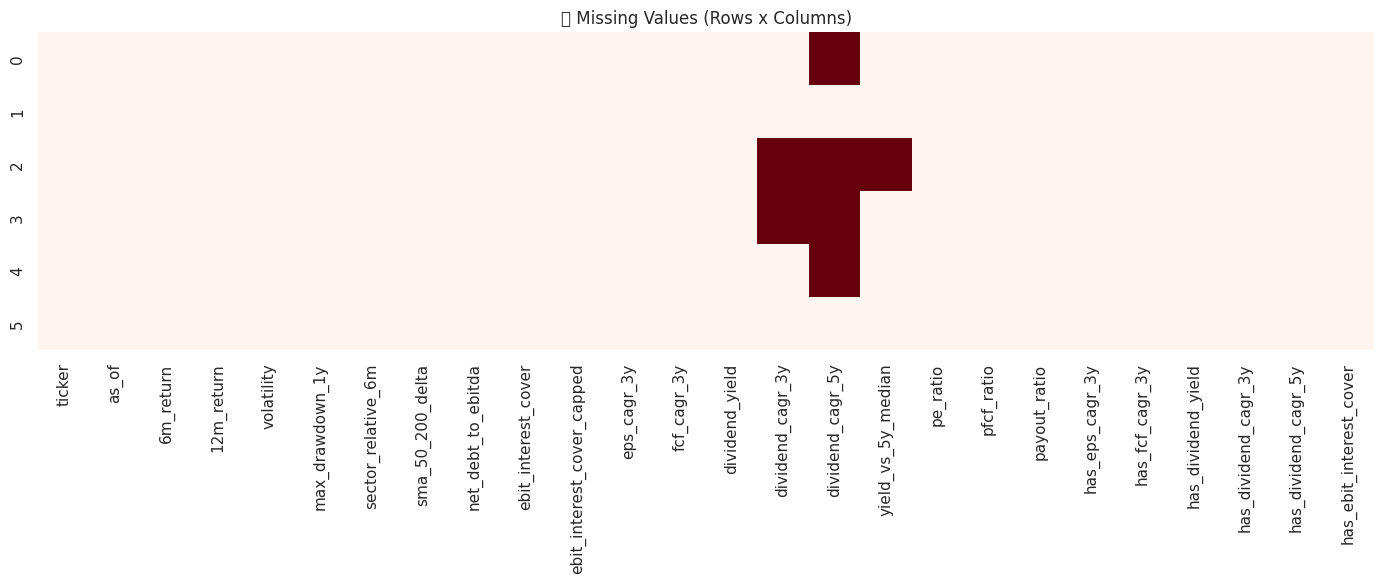

In [4]:
plt.figure(figsize=(14, 6))
sns.heatmap(pdf.isnull(), cbar=False, cmap="Reds")
plt.title("🧯 Missing Values (Rows x Columns)")
plt.tight_layout()
plt.show()

### 🧮 Define Metric Groups

In [5]:
metric_groups = {
    "Growth": ["eps_cagr_3y", "fcf_cagr_3y", "dividend_cagr_3y", "dividend_cagr_5y"],
    "Returns & Volatility": ["6m_return", "12m_return", "sector_relative_6m", "volatility", "max_drawdown_1y"],
    "Fundamentals": ["pe_ratio", "pfcf_ratio", "payout_ratio", "dividend_yield", "yield_vs_5y_median",
                     "net_debt_to_ebitda", "ebit_interest_cover", "ebit_interest_cover_capped"]
}

def clean(df, cols):
    return df[cols].replace([np.inf, -np.inf], np.nan).dropna()

### 📊 Histograms

/tmp/ipykernel_2362/622581637.py:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


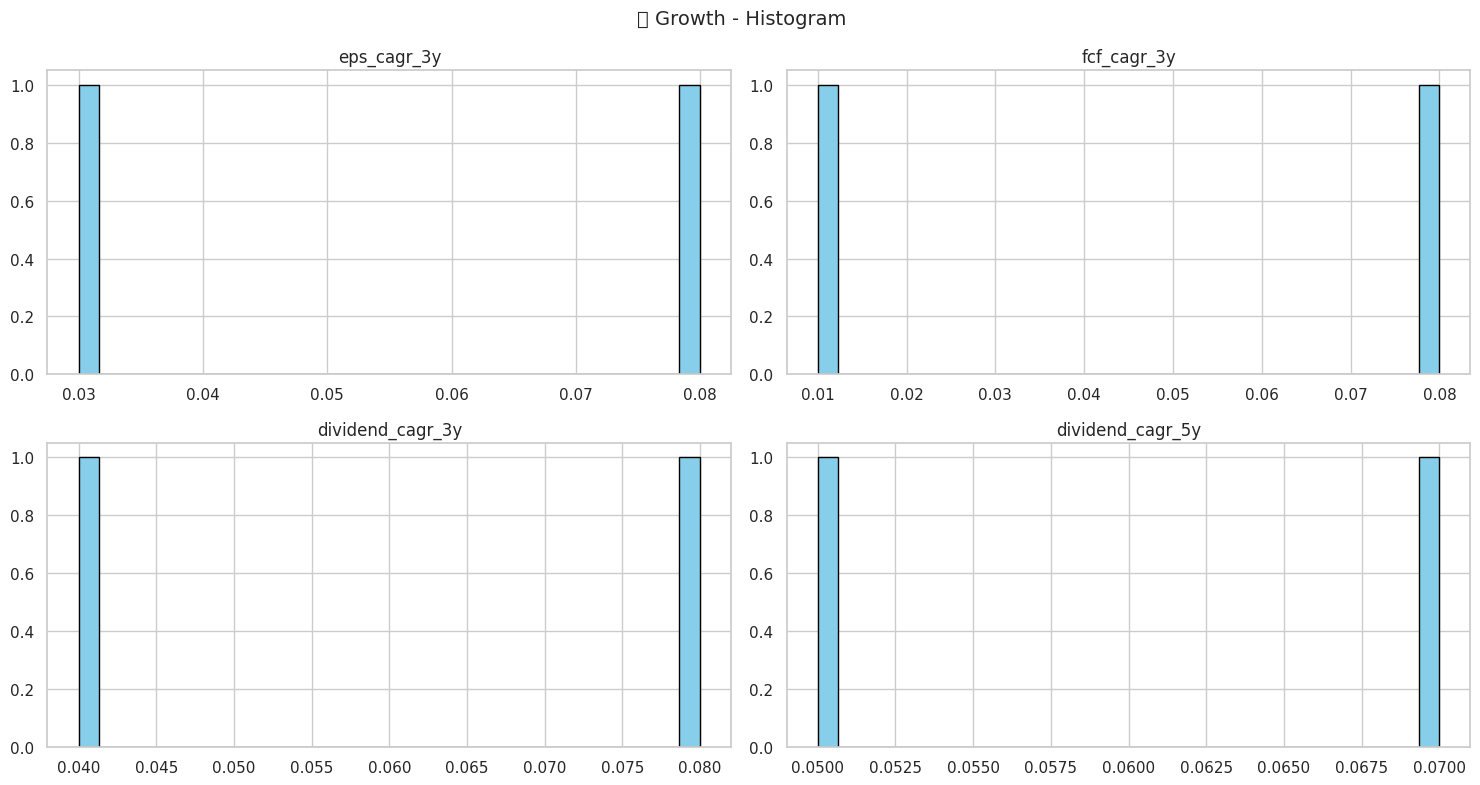

/tmp/ipykernel_2362/622581637.py:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


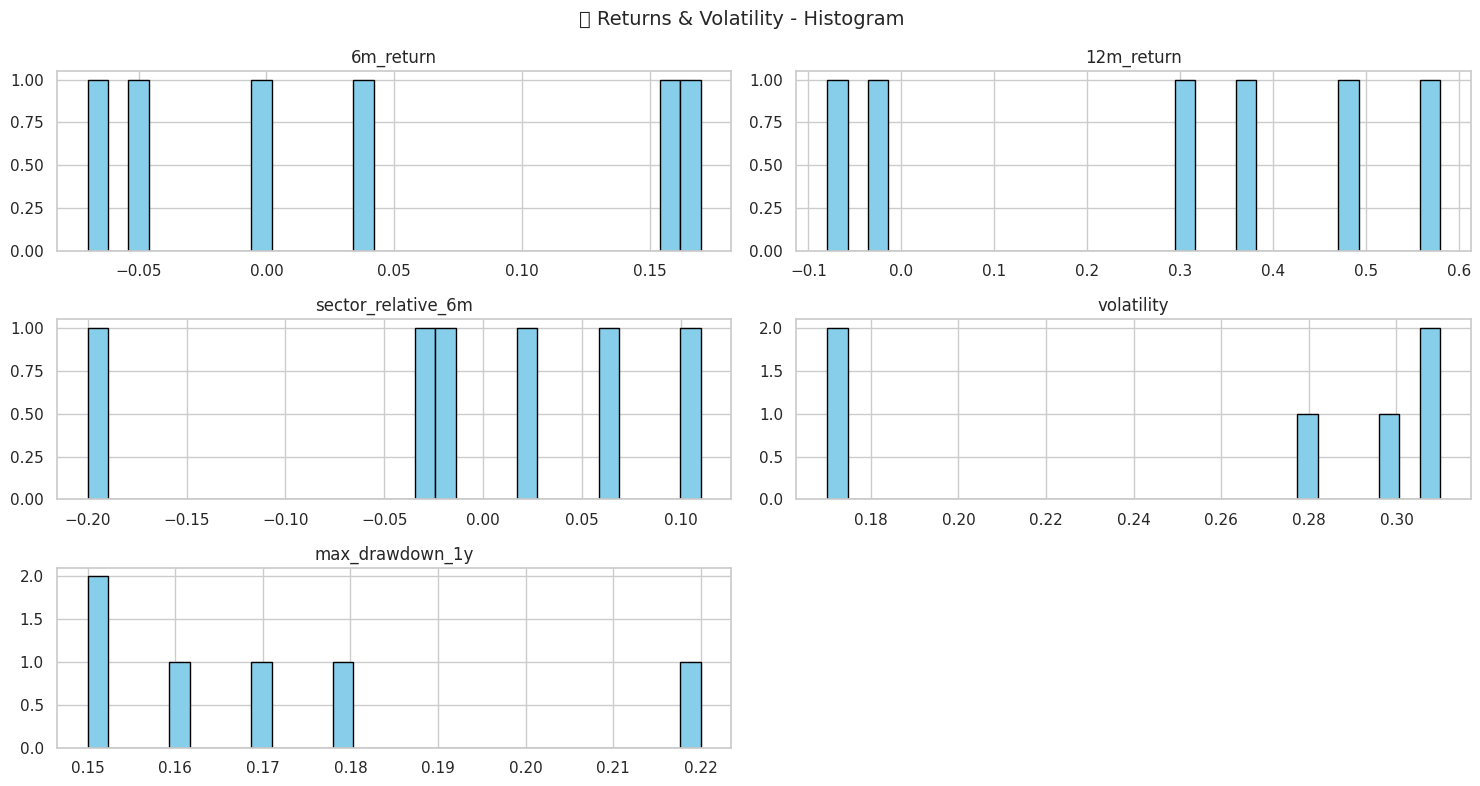

/tmp/ipykernel_2362/622581637.py:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


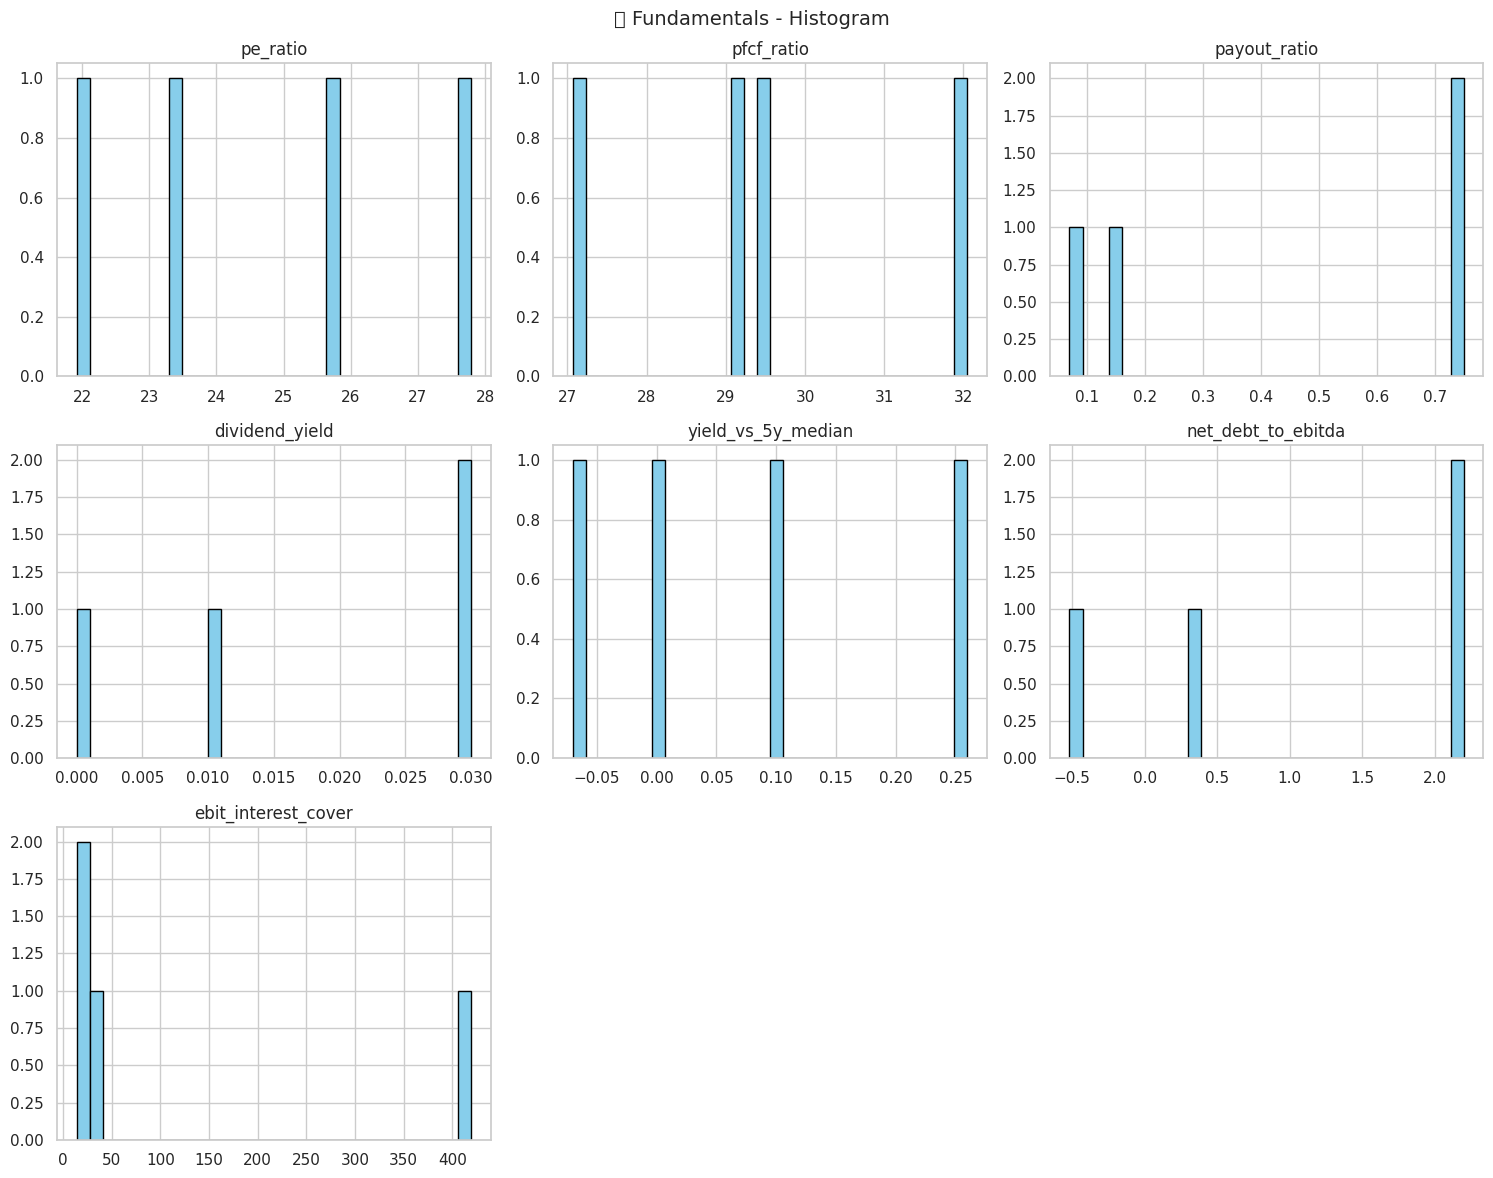

In [6]:
for name, cols in metric_groups.items():
    df_group = clean(pdf, cols)
    df_group.hist(bins=30, figsize=(5 * min(3, len(cols)), 4 * (len(cols) // 3 + 1)), edgecolor='black', color='skyblue')
    plt.suptitle(f"📊 {name} - Histogram", fontsize=14)
    plt.tight_layout()
    plt.show()

### 📈 Boxplots

/tmp/ipykernel_2362/956241388.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


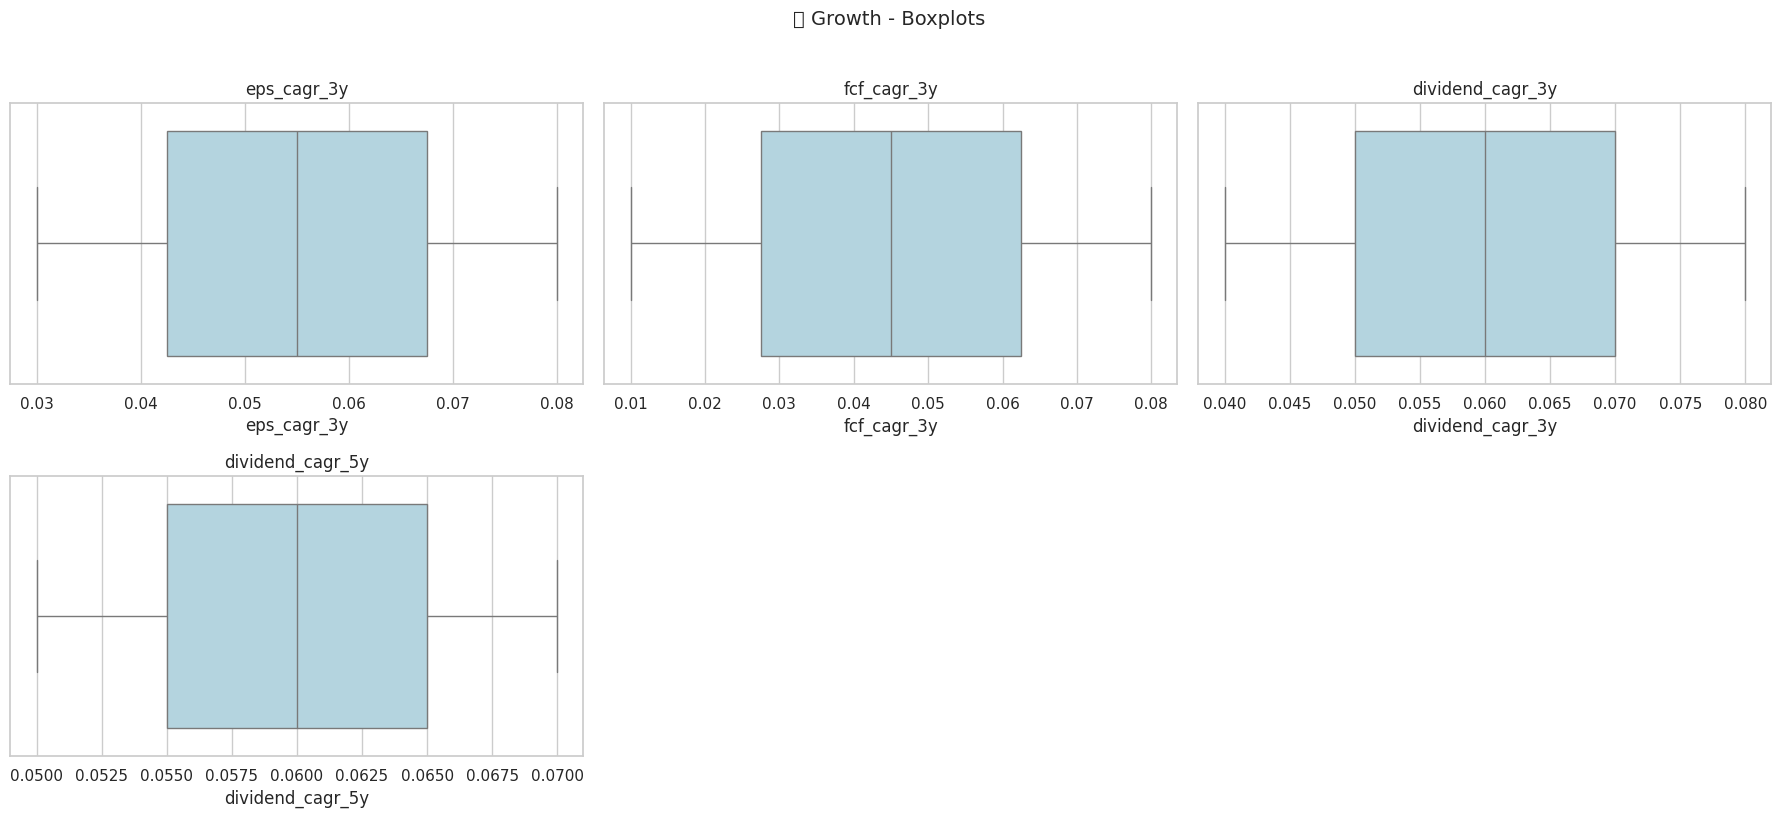

/tmp/ipykernel_2362/956241388.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


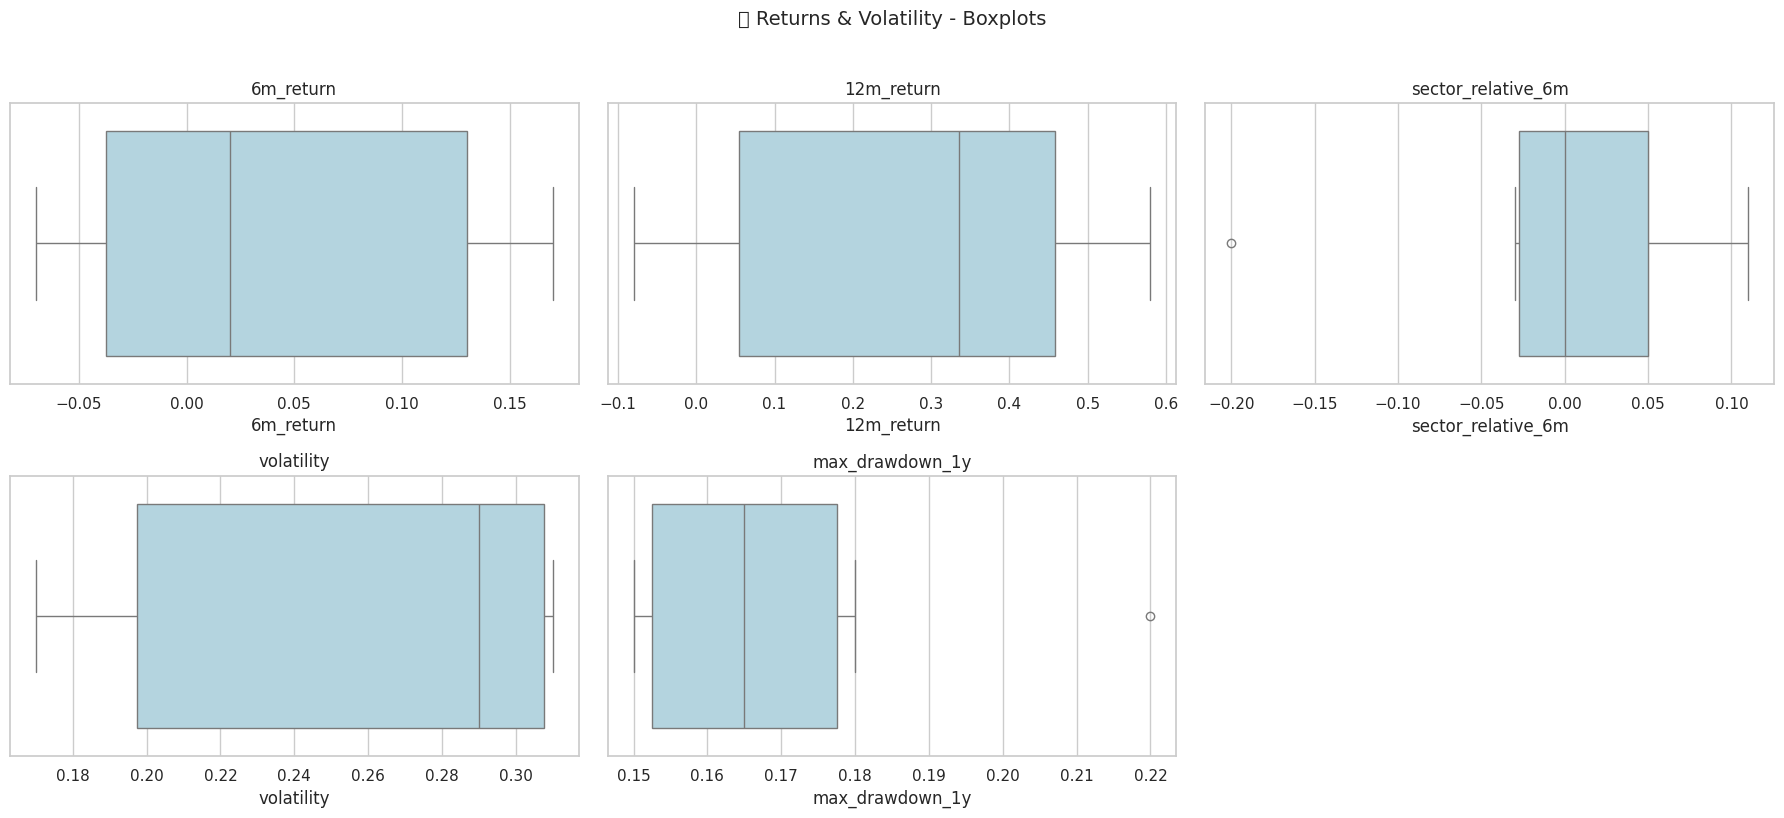

/tmp/ipykernel_2362/956241388.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspaces/dvmax/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


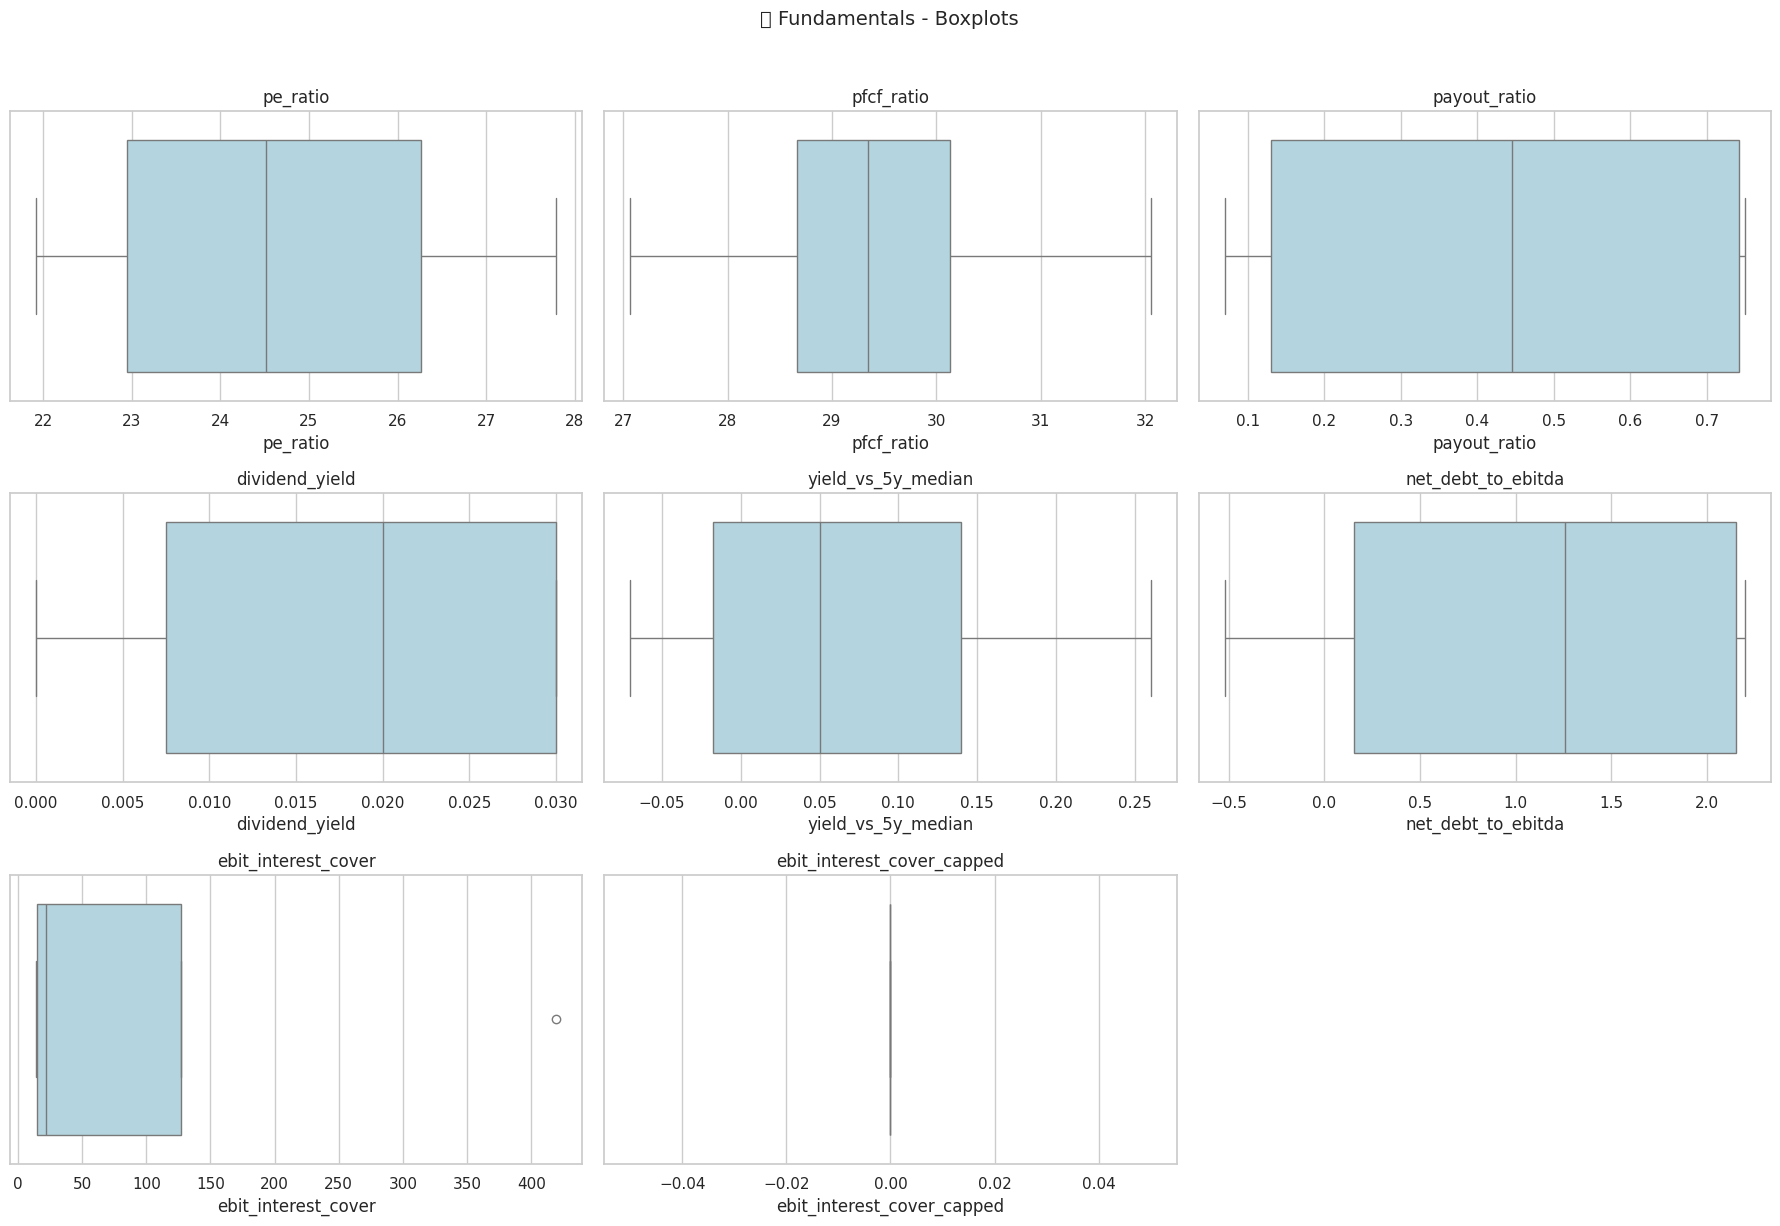

In [7]:
for name, cols in metric_groups.items():
    df_group = clean(pdf, cols)
    plt.figure(figsize=(6 * min(3, len(cols)), 4 * (len(cols) // 3 + 1)))
    for i, col in enumerate(cols):
        plt.subplot((len(cols) - 1) // 3 + 1, min(3, len(cols)), i + 1)
        sns.boxplot(x=df_group[col], color="lightblue")
        plt.title(col)
    plt.suptitle(f"📈 {name} - Boxplots", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

### 📌 Correlation Heatmaps

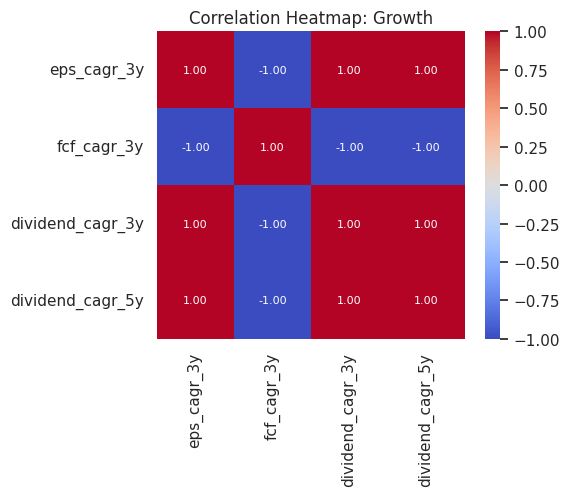

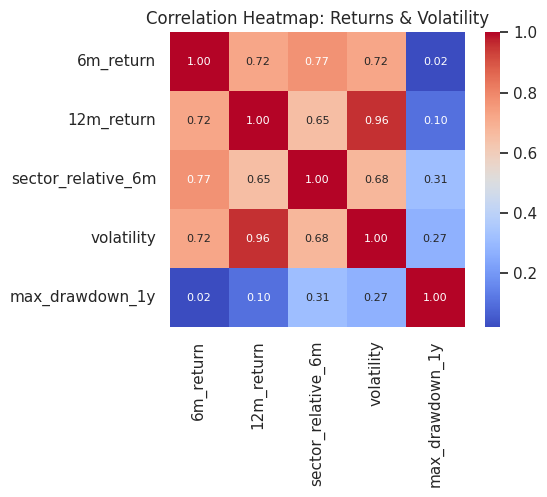

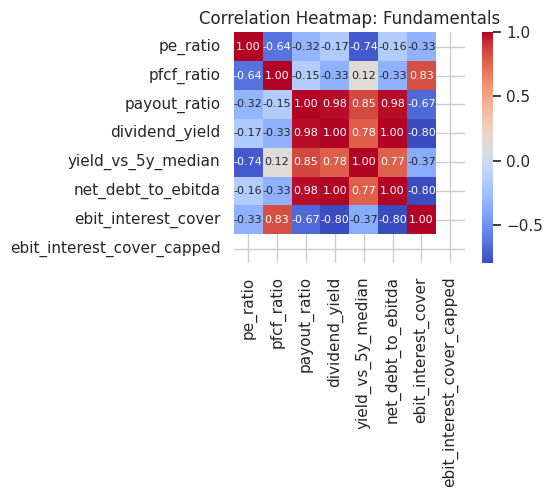

In [8]:
def clean_numeric(df, cols):
    sub_df = df[cols].replace([np.inf, -np.inf], np.nan).dropna()
    return sub_df

for group_name, cols in metric_groups.items():
    sub_df = clean_numeric(pdf, cols)
    if sub_df.shape[1] > 1:
        plt.figure(figsize=(6, 5))
        sns.heatmap(
            sub_df.corr(), annot=True, fmt=".2f", cmap="coolwarm",
            square=True, cbar=True, annot_kws={"size": 8}
        )
        plt.title(f"Correlation Heatmap: {group_name}")
        plt.tight_layout()
        plt.show()

### 🕸 Radar Chart (Normalized Per Group)

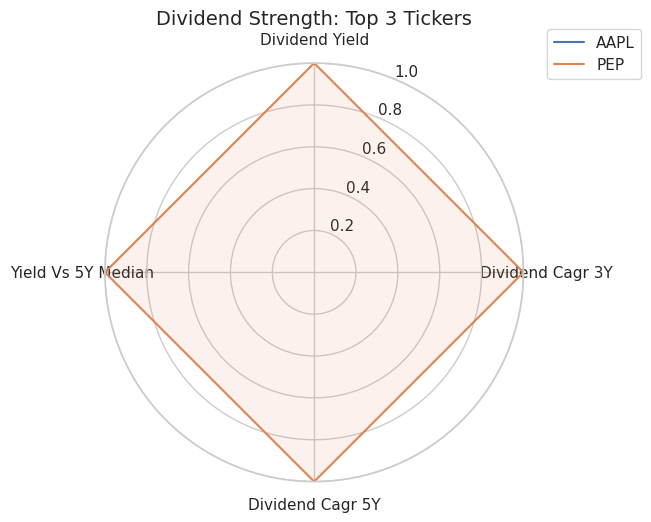

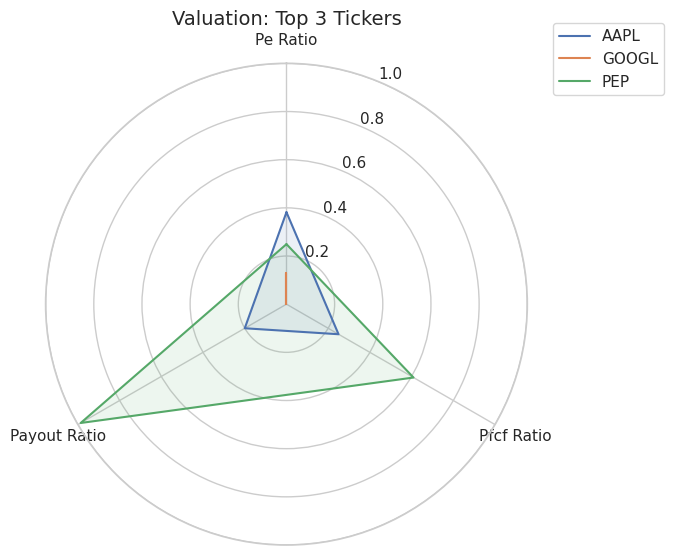

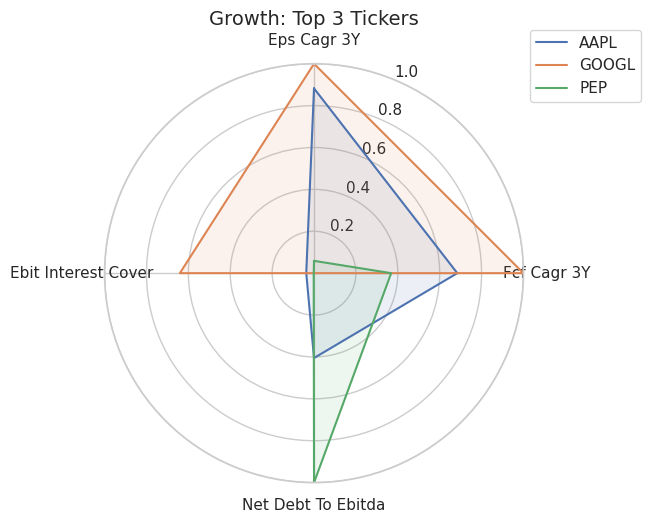

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

def plot_radar(df_polars, tickers, features, title="Radar Chart"):
    # Convert to pandas and filter relevant tickers
    df = df_polars.filter(pl.col("ticker").is_in(tickers)).select(["ticker"] + features).to_pandas()
    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=features)
    if df.empty:
        print(f"⚠️ No valid data for: {title}")
        return

    # Remove constant-value features
    variable_features = [f for f in features if df[f].nunique(dropna=True) > 1]
    if len(variable_features) < 2:
        print(f"⚠️ Not enough variable features for radar: {title}")
        return

    # Normalize each feature to [0, 1]
    df_norm = df.set_index("ticker")
    df_norm = (df_norm[variable_features] - df_norm[variable_features].min()) / \
              (df_norm[variable_features].max() - df_norm[variable_features].min())

    # Angles for radar chart
    num_vars = len(variable_features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # close the loop

    # Start radar plot
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    for ticker in df_norm.index.unique():
        row = df_norm.loc[ticker]
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]  # pick the first row if duplicates exist
        values = row.values.tolist()
        values += values[:1]  # close the loop
        if len(values) != len(angles):
            print(f"⚠️ Skipping {ticker} due to mismatch (values={len(values)}, angles={len(angles)}).")
            continue
        ax.plot(angles, values, label=ticker)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), [f.replace("_", " ").title() for f in variable_features])
    ax.set_ylim(0, 1)
    ax.set_title(title, size=14)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


def get_top_complete_tickers(pdf, features, top_n=6):
    df = pdf.select(["ticker"] + features).drop_nulls()
    counts = df.group_by("ticker").len().sort("len", descending=True)
    return counts.head(top_n)["ticker"].to_list()

# Example metric groups (customize as needed)
metric_groups = {
    "Dividend Strength": ["dividend_yield", "dividend_cagr_3y", "dividend_cagr_5y", "yield_vs_5y_median"],
    "Valuation": ["pe_ratio", "pfcf_ratio", "payout_ratio"],
    "Growth": ["eps_cagr_3y", "fcf_cagr_3y", "net_debt_to_ebitda", "ebit_interest_cover"]
}

# Plot radar for each group
for group_name, features in metric_groups.items():
    top_tickers = get_top_complete_tickers(df, features, top_n=6)
    plot_radar(df, top_tickers, features, title=f"{group_name}: Top {len(top_tickers)} Tickers")


### 📉 Raw Feature Values per Ticker

In [10]:
def plot_raw(df, tickers, features, title="Raw Feature Values"):
    df_sub = df[df["ticker"].isin(tickers)][["ticker"] + features].replace([np.inf, -np.inf], np.nan).dropna()
    df_sub.set_index("ticker", inplace=True)
    ax = df_sub.plot(kind="bar", figsize=(10, 6))
    plt.title(title)
    plt.ylabel("Raw Value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

ENABLE_RAW_PLOTS = False

if ENABLE_RAW_PLOTS:
    for group_name, features in metric_groups.items():
        for i in range(0, len(tickers), 5):
            batch = tickers[i:i + 5]
            plot_raw(pdf.copy(), batch, features, title=f"{group_name}: {', '.join(batch)}")